<a href="https://colab.research.google.com/github/nnoohm/modelopredictivo/blob/main/Proyecto_Equipo_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Modelo predictivo de calificación de películas en función de características como ingresos, popularidad, género y tiempo de duración**

Nuestro proyecto tiene como objetivo predecir la calificación de películas que un usuario dará a una película utilizando un conjunto de datos de calificaciones de películas y modelos de regresión, a partir de a partir de sus ingresos, popularidad, género y tiempo de duración.

El dataset fue obtenido de la plataforma de Kaggle y puede encontrarse en el siguiente link: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

La base de datos contiene 988,728 registros, distribuidos en 22 columnas que almacenan la siguiente información:

In [ ]:
descripcion_columnas = {'Nombre de la columna':['title', 'vote_average', 'vote_count', 'status', 'release_date',
                                                'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
                                                'imdb_id', 'original_language', 'original_title', 'overview',
                                                'popularity', 'poster_path', 'tagline', 'genres', 'production_companies',
                                                'production_countries', 'spoken_languages'],
                        'Descripción':['Título de la película', 'Puntuación media de la película',
                                       'Cantidad total de votos recibidos', 'Estado actual de la película', 'Fecha de estreno',
                                       'Ingresos financieros generados', 'Duración de la película en minutos',
                                       'Indicador de clasificación para adultos', 'Ruta de imagen promocional',
                                       'Presupuesto de producción', 'Página web asociada', 'Identificador en Internet Movie Database',
                                       'Idioma original de la película', 'Título original en el idioma original',
                                       'Breve descripción de la trama', 'Índice de popularidad', 'Ruta al póster de la película',
                                       'Eslogan o lema asociado', 'Géneros cinematográficos', 'Compañías que participaron en la producción',
                                       'Países donde se produjo la película', 'Idiomas hablados en la película']}
df_descripcion_columnas = pd.DataFrame (descripcion_columnas)
df_descripcion_columnas

,Nombre de la columna,Descripción
0,title,Título de la película
1,vote_average,Puntuación media de la película
2,vote_count,Cantidad total de votos recibidos
3,status,Estado actual de la película
4,release_date,Fecha de estreno
5,revenue,Ingresos financieros generados
6,runtime,Duración de la película en minutos
7,adult,Indicador de clasificación para adultos
8,backdrop_path,Ruta de imagen promocional
9,budget,Presupuesto de producción


# Vinculamos al dataset:

Importamos el dataset que vamos a trabajar en archivo .csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Equipo 23 - PLAN B/TMDB_movie_dataset_v11.csv", index_col=0)
df.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
id,,,,,,,,,,,,,,,,,,,,,
27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


Las dimensiones de nuestro dataset son las siguientes:

In [ ]:
df.shape

(988728, 22)

Además, cuenta con datos de tipo object, float, int y bool.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988728 entries, 27205 to 1240227
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   title                 988716 non-null  object 
 1   vote_average          988728 non-null  float64
 2   vote_count            988728 non-null  int64  
 3   status                988728 non-null  object 
 4   release_date          880177 non-null  object 
 5   revenue               988728 non-null  int64  
 6   runtime               988728 non-null  int64  
 7   adult                 988728 non-null  bool   
 8   backdrop_path         282628 non-null  object 
 9   budget                988728 non-null  int64  
 10  homepage              107261 non-null  object 
 11  imdb_id               568451 non-null  object 
 12  original_language     988728 non-null  object 
 13  original_title        988716 non-null  object 
 14  overview              810916 non-null  object 


Las 22 columnas están identificadas con los siguientes nombres:

In [ ]:
df.columns

Index(['title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

## **Limpieza de datos**

En nuestro próximo análisis, podemos prescindir de ciertas columnas, ya que contienen información que no resulta esencial para nuestros objetivos. Estas columnas son: id, status, adult, backdrop_path, homepage, imbd_id, original_title, overview, poster_path, tagline, production_companies y spoken_languages.


### **Valores flotantes y valores duplicados**

Basándonos en la información anterior, utilizaremos las siguientes variables para nuestro análisis para abordar aspectos críticos en nuestro análisis cinematográfico. A continuación, detallamos algunas variables que van a ser particularmente relevantes para nuestro modelo predictivo:

* `'title'(título):`
Identificador clave para distinguir y asociar cada registro con una película específica.

* `'vote_average' (calificación promedio):`
Indica la evaluación subjetiva de la calidad de la película por parte del público.

* `'vote_count' (número de votos):`
Ofrece una medida de la popularidad de la película basada en la participación del público.

* `'release_date' (fecha de lanzamiento):`
Permite explorar tendencias a lo largo del tiempo y su impacto en la recepción y los ingresos.

* `'revenue' (ingresos):`
Indica el rendimiento económico de la película, clave para la predicción.

* `'runtime' (duración):`
Puede influir en la popularidad y éxito, especialmente en relación con las preferencias del público.

* `'budget' (presupuesto):`
 El presupuesto puede impactar en la calidad de producción y, por ende, en la calificación y los ingresos.

* `'original_language' (idioma original):`
Puede influir en la audiencia objetivo y en cómo se recibe la película en diferentes regiones.

* `'popularity' (popularidad):`
Proporciona una medida cuantitativa del interés del público, valiosa para la predicción.

* `'genres' (géneros):`
Permite explorar cómo los géneros influyen en la popularidad y los ingresos.

* `'production_companies' (empresas productoras):`
Identificar la influencia de las productoras exitosas en el rendimiento de la película.


Ahora, realizaremos un análisis de las variables mencionadas para identificar la presencia de valores faltantes y duplicados.

In [ ]:
df = df[['title', 'vote_average', 'vote_count', 'release_date', 'revenue','runtime', 'budget',
        'original_language', 'popularity', 'genres', 'production_companies',]]

In [ ]:
def porcentaje_faltantes(data):

    # Calcula el número de valores faltantes en cada columna
    nan = pd.DataFrame(data.isna().sum(), columns=['nan'])

    # Filtra las variables que tienen valores faltantes
    nan = nan[nan['nan'] > 0]

    # Calcula el porcentaje de valores faltantes
    nan['Porcentaje'] = (nan['nan'] / len(data)) * 100

    # Renombra la columna 'nan'
    nan = nan.rename(columns={'nan': 'Total de faltantes'})

    return nan

In [ ]:
porcentaje_faltantes(df)

,Total de faltantes,Porcentaje
title,12,0.001214
release_date,108551,10.978854
genres,360945,36.505996
production_companies,515531,52.140831


Omitiremos "production_companies", "genres" y "release_date" por el alto porcentaje de valores faltantes.


In [ ]:
df.drop(columns = ['production_companies', 'release_date'], axis= 1, inplace= True)


A pesar de la presencia de datos faltantes, "genres" tiene un papel fundamental en el análisis de preferencias y tendencias cinematográficas.

In [ ]:
porcentaje_faltantes(df)

,Total de faltantes,Porcentaje
title,12,0.001214
genres,360945,36.505996


Contamos el número de valores duplicados en el DataFrame:


In [ ]:
df.duplicated().sum()

1593

Vamos a ver las primeras 5 filas duplicadas en nuestro DataFrame

In [ ]:
df[df.duplicated()].head(5)

,title,vote_average,vote_count,revenue,runtime,budget,original_language,popularity,genres
id,,,,,,,,,
679602,La ley de la mafia,5.0,2,0,0,0,es,0.6,NaN
669045,Los chicos de la prensa,5.0,2,0,0,0,en,0.6,NaN
668892,Clemencia,5.0,2,0,0,0,en,0.6,NaN
677500,El charro del misterio,5.0,2,0,80,0,es,0.6,NaN
1119666,The Fall,10.0,1,0,1,0,en,0.6,NaN


Eliminamos los valores duplicados en nuestro DataFrame

In [ ]:
df.drop_duplicates(inplace=True)

Contamos el número de valores duplicados en el DataFrame después de eliminar los duplicados

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(987135, 9)

Vamos a eliminar los valores faltantes de las demás columnas

In [ ]:
df = df.dropna()

## **Estimados de locación y variabilidad**

Vamos a realizar un análisis estadístico de nuestros datos con el objetivo de identificar posibles valores atípicos (outliers) y comprender las distribuciones presentes en nuestro conjunto de datos. Este proceso nos permitirá obtener insights sobre la variabilidad y la forma general de las variables clave, mejorando así nuestra comprensión de la naturaleza de los datos.

In [ ]:
df.describe()

,vote_average,vote_count,revenue,runtime,budget,popularity
count,627476.000000,627476.000000,6.274760e+05,627476.000000,6.274760e+05,627476.000000
mean,2.766815,33.985489,1.159506e+06,55.092410,4.551248e+05,1.782361
std,3.257595,428.085174,2.215484e+07,60.981812,6.231794e+06,10.076872
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000e+00,6.000000,0.000000e+00,0.600000
50%,0.000000,0.000000,0.000000e+00,57.000000,0.000000e+00,0.618000
75%,6.000000,3.000000,0.000000e+00,91.000000,0.000000e+00,1.336000
max,10.000000,34495.000000,3.000000e+09,14400.000000,8.880000e+08,2994.357000


Además, incluimos el resultado de la mediana para cada una de las variables numéricas.

In [ ]:
mediana = (df[['vote_average', 'vote_count', 'revenue', 'runtime', 'budget', 'popularity']].median())
mediana

vote_average     0.000
vote_count       0.000
revenue          0.000
runtime         57.000
budget           0.000
popularity       0.618
dtype: float64

Por último, calculamos la moda de cada una de las variables numéricas.

In [ ]:
moda = (df[['vote_average', 'vote_count', 'revenue', 'runtime', 'budget', 'popularity']].mode())
moda

,vote_average,vote_count,revenue,runtime,budget,popularity
0,0.0,0,0,0,0,0.6


Al analizar estas dos últimas medidas de tendencia central, vemos que no nos proporcionan información relevante. Esto se debe a que los datos están sesgados hacia el valor 0. En otros palabras, la mayoría de observaciones de las variables numéricas se concentrar alrededor del 0, lo cual será explicado más adelante, considerando los valores atípicos.

###**Matriz de correlación**

Vamos a realizar nuestra matriz de correlación para identificar las correlaciones moderadas o fuertes.

Encontramos útil enfocarnos en las relaciones con correlaciones más fuertes para obtener los insights más significaticos en nuestro análisis.

Además, calcularemos los coeficientes de Pearson para examinar la correlación lineal entre las variables de nuestro conjunto de datos. En esta sección, nos centraremos exclusivamente en las variables numéricas, que son las adecuadas para este tipo de análisis.

In [ ]:
df.corr(numeric_only=True)

,vote_average,vote_count,revenue,runtime,budget,popularity
vote_average,1.000000,0.099089,0.063334,0.229559,0.075712,0.110802
vote_count,0.099089,1.000000,0.756493,0.072073,0.619807,0.253475
revenue,0.063334,0.756493,1.000000,0.052784,0.720952,0.246981
runtime,0.229559,0.072073,0.052784,1.000000,0.067562,0.079075
budget,0.075712,0.619807,0.720952,0.067562,1.000000,0.261470
popularity,0.110802,0.253475,0.246981,0.079075,0.261470,1.000000


En primera instancia, podemos observar que existe una diagonal de valores iguales a 1. Esto se debe a que la variable se relaciona consigo misma en esa celda.


Para facilitar la interpretación de los coeficientes de Pearson obtenidos, usaremos un mapa de calor.

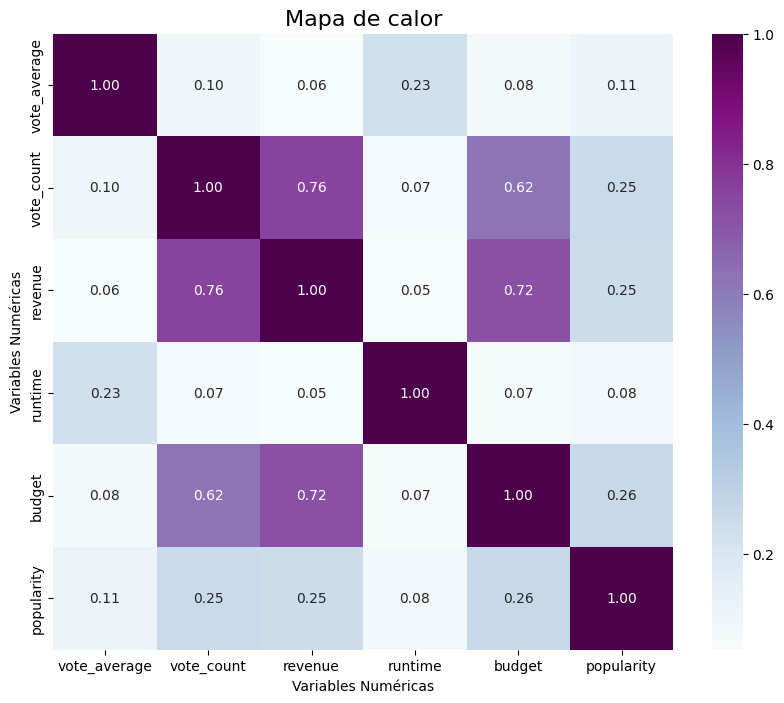

In [ ]:
def mov_map_cor(df):
    corr_matriz = df.corr(numeric_only=True)

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matriz, annot=True, fmt=".2f", cmap="BuPu")
    plt.title("Mapa de calor", fontsize=16)
    plt.xlabel("Variables Numéricas")
    plt.ylabel("Variables Numéricas")
    plt.show()

mov_map_cor(df)

A partir de estos valores, podemos afirmar que existen **2 correlaciones positivas fuertes**, de las que podemos concluir:

* **`Correlación entre 'vote_count' y 'revenue':`** Existe una correlación positiva fuerte (0.756493), indicando que **películas con mayor número de votos tienden a tener ingresos más altos**. Esto sugiere que la popularidad puede influir significativamente en el rendimiento económico.

* **`Correlación entre 'budget' y 'revenue':`** Con un coeficiente de 0.720952, se observa una correlación positiva fuerte entre el presupuesto de una película y sus ingresos. Esto sugiere que **invertir más en la producción de una película puede resultar en mayores ganancias**.

Además, identificamos **1 correlación positiva moderada**, de la que se puede interpretar:

* **`Correlación entre 'budget' y 'vote_count':`** Hay una correlación positiva moderada (0.619807), lo que podría indicar que **las películas con mayores presupuestos tienden a recibir más votos**, posiblemente debido a una mayor atención o expectativas del público.

Asimismo, se observan **2 correlaciones positivas débiles**, de las cuales podemos concluir:

* **`Correlación entre 'vote_average' y 'runtime':`** Existe una correlación positiva débil (0.229559), lo que sugiere que **las películas de mayor duración podrían tener una mejor calificación promedio**, quizás debido a una narrativa más desarrollada o producción más detallada.

* **`Correlación entre 'popularity' y 'budget':`** Con un coeficiente de 0.261470, hay una correlación positiva débil, indicando que **películas con mayores presupuestos pueden ser más populares**, posiblemente debido a campañas de marketing más amplias o elenco de mayor renombre.

Finalmente, contamos con múltimples **correlaciones casi nulas**, las cuales no son relevantes para nuestro análisis.

Procederemos a generar gráficas de dispersión, también conocidas como scatterplots, con el fin de visualizar la relación entre las variables mencionadas.

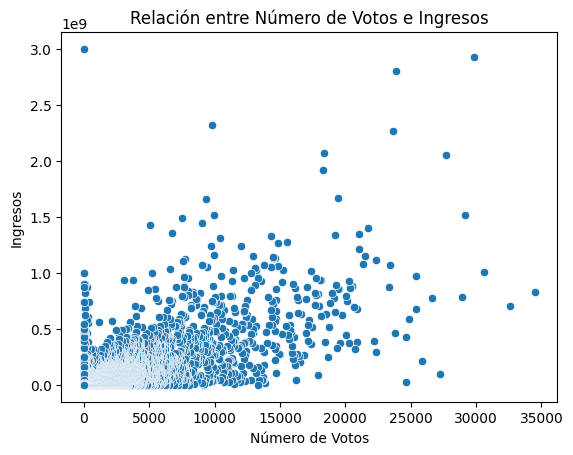

In [ ]:
sns.scatterplot(data=df, x='vote_count', y='revenue')
plt.xlabel('Número de Votos')
plt.ylabel('Ingresos')
plt.title('Relación entre Número de Votos e Ingresos')
plt.show()

Existe una correlación positiva moderadamente fuerte de 0.756493 entre la cantidad de votos recibidos y los ingresos generados por la película. Esto sugiere que películas con más votos tienden a tener mayores ingresos.

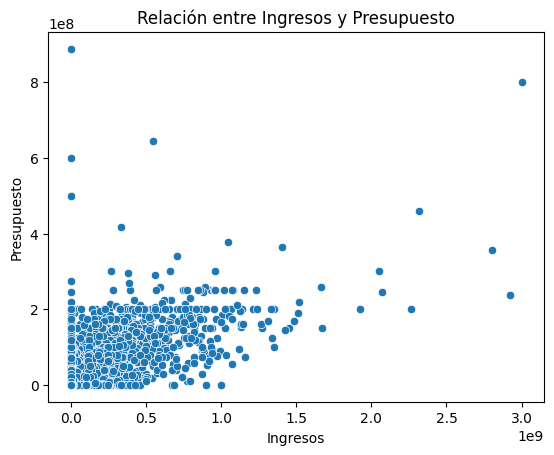

In [ ]:
sns.scatterplot(data=df, x='revenue', y='budget')
plt.xlabel('Ingresos')
plt.ylabel('Presupuesto')
plt.title('Relación entre Ingresos y Presupuesto')
plt.show()

Vamos a crear un DataFrame para eliminar los valores iguales a 0

In [ ]:
df_no_zeros = df[df['revenue'] > 0]

In [ ]:
df_no_zeros['revenue'].corr(df_no_zeros['budget'])

0.7466530754439169

Se creará un DataFrame, denominado "df_no_zeros", mediante la exclusión de los valores de "revenue" iguales a cero del DataFrame original. Posteriormente, se calculará la correlación entre la columna "revenue" y "budget" en el DataFrame modificado.

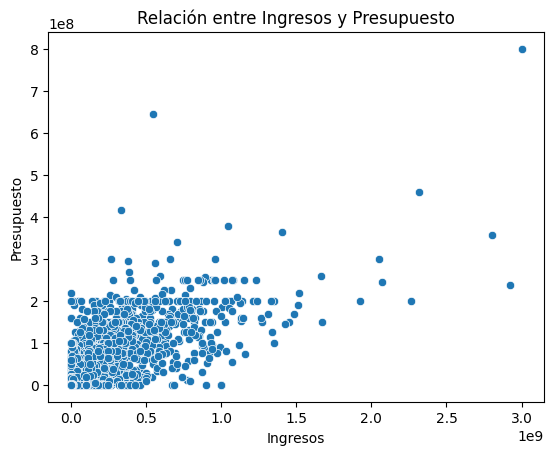

In [ ]:
sns.scatterplot(data=df, x=df_no_zeros['revenue'], y=df_no_zeros['budget'])
plt.xlabel('Ingresos')
plt.ylabel('Presupuesto')
plt.title('Relación entre Ingresos y Presupuesto')
plt.show()

 Vemos que hay una correlación positiva moderadamente fuerte de 0.720952 entre los ingresos generados y el presupuesto de la película. Esto indica que películas con mayores presupuestos tienden a generar más ingresos.

## **Eliminación de valores atípicos**

Para la eliminacion de los valores atipicos es necesario utilizar la herramienta de boxplot, este hace una grafica de caja a partir de datos quartinales.
Para ello vamos a utilizar las siguientes librerias de Phyton:



* **`import seaborn as sns':`** Visualiza los datos de Phyton desarrollada sobre matplotlib.

* **`import matplotlib.pyplot as plt':`**  Esta especializada en la creación de gráficos en dos dimensiones.




Paso 1: Realizaremos una grafica a partir de los datos de vote_average, vote_count, revenue y runtime para determinar los quantiles, antes de la eliminación de los valores atipicos como despues de la eliminacion de dichos valores.


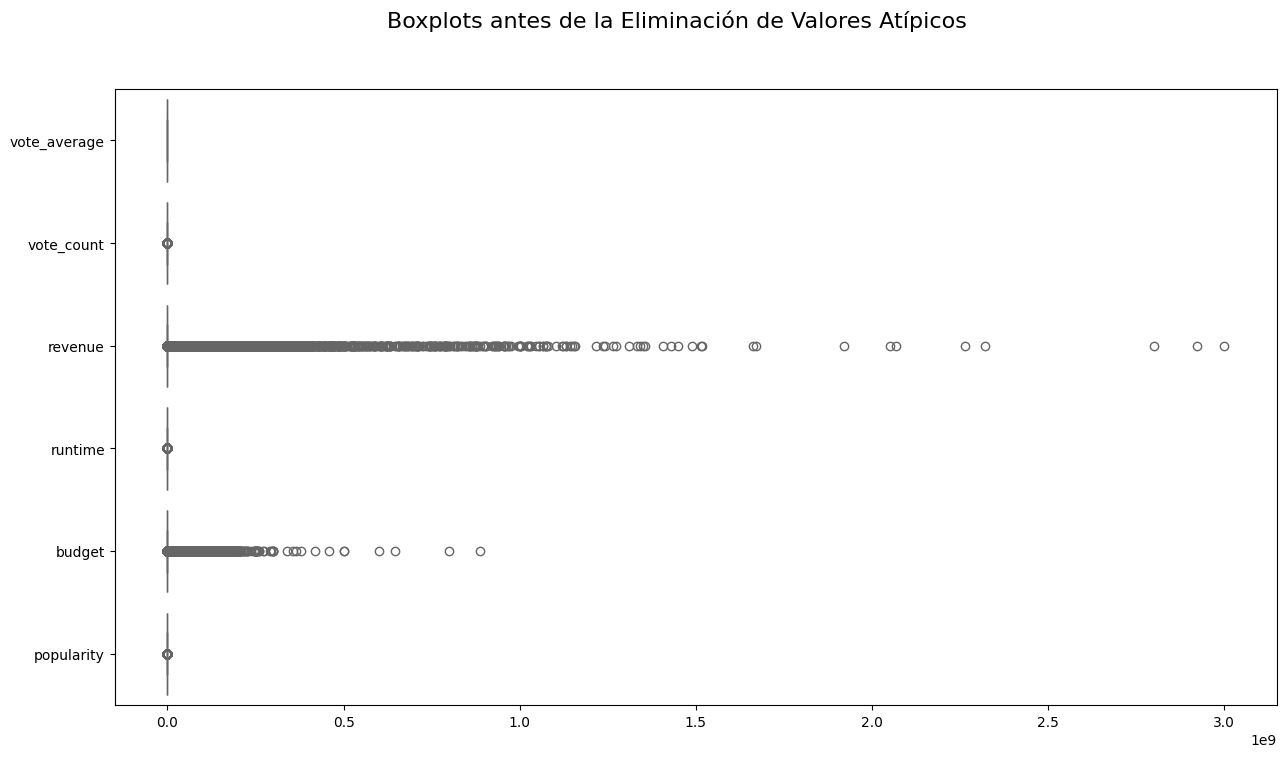

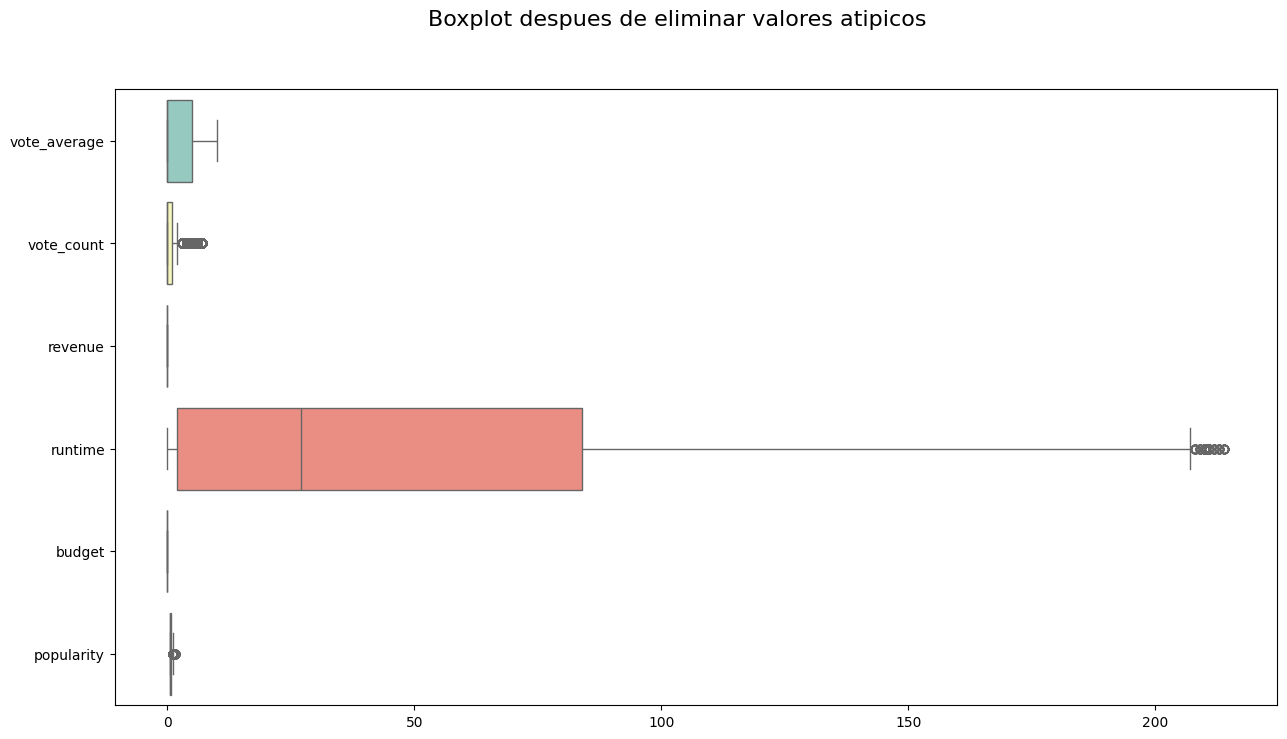

In [ ]:
plt.figure(figsize=(15, 8))
plt.suptitle('Boxplots antes de la Eliminación de Valores Atípicos', fontsize=16)
sns.boxplot(data=df, orient='h', palette='Set3')
plt.show()

df_limpio = df.copy()
for columna in df_limpio.select_dtypes(include='number').columns:
    Q1 = df_limpio[columna].quantile(0.25)
    Q3 = df_limpio[columna].quantile(0.75)
    IQR = Q3 - Q1
    filtro = (df_limpio[columna] >= (Q1 - 1.5 * IQR)) & (df_limpio[columna] <= (Q3 + 1.5 * IQR))
    df_limpio = df_limpio.loc[filtro]

plt.figure(figsize=(15, 8))
plt.suptitle('Boxplot despues de eliminar valores atipicos', fontsize=16)
sns.boxplot(data=df_limpio, orient='h', palette='Set3')
plt.show()

Vamos a entender que los valores atipicos son aquellos datos desproporcionado en los resultados estadísticos, como la **`media`**, que nos puede dar una mala interpretacion de los datos

El resultado obtenido en los diagramas tras eliminar los valores atipicos, permite entender la mediana de las variables por ejemplo la media de runtime es de 25 quantiles.
El uso de esta herramienta tambien nos permite la identificacion de que datos hay un valor de 0 como es el caso de **budget**, **renueve** y en cierta vista los datos de **popularity**.
No obstante tambien podemos interpretar la variabilidad de **vote_count** y **vote _average** que esto se relaizara a continuaciòn.



Calcularemos la diferencia entre la puntuación máxima y mínima en nuestros datos seleccionados, lo que nos dará una idea de la variabilidad en las puntuaciones promedio de tus datos.

In [ ]:
puntuacion_promedio = df['vote_average']
puntuacion_promedio.max() - puntuacion_promedio.min()

10.0

In [ ]:
total_de_votos = df['vote_count']
total_de_votos.max() - total_de_votos.min()

34495

Calcularemos la diferencia entre la puntuación máxima y mínima en nuestros datos seleccionados, lo que nos dará una idea de la variabilidad en las puntuaciones promedio de tus datos.

In [ ]:
pd.cut(puntuacion_promedio, 10)

id
27205        (8.0, 9.0]
157336       (8.0, 9.0]
155          (8.0, 9.0]
19995        (7.0, 8.0]
24428        (7.0, 8.0]
               ...     
657831     (-0.01, 1.0]
657832     (-0.01, 1.0]
657835     (-0.01, 1.0]
657836     (-0.01, 1.0]
1240227    (-0.01, 1.0]
Name: vote_average, Length: 627476, dtype: category
Categories (10, interval[float64, right]): [(-0.01, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] < ... <
                                            (6.0, 7.0] < (7.0, 8.0] < (8.0, 9.0] < (9.0, 10.0]]

In [ ]:
pd.cut(total_de_votos, 10)

id
27205      (31045.5, 34495.0]
157336     (31045.5, 34495.0]
155        (27596.0, 31045.5]
19995      (27596.0, 31045.5]
24428      (27596.0, 31045.5]
                  ...        
657831      (-34.495, 3449.5]
657832      (-34.495, 3449.5]
657835      (-34.495, 3449.5]
657836      (-34.495, 3449.5]
1240227     (-34.495, 3449.5]
Name: vote_count, Length: 627476, dtype: category
Categories (10, interval[float64, right]): [(-34.495, 3449.5] < (3449.5, 6899.0] < (6899.0, 10348.5] <
                                            (10348.5, 13798.0] ... (20697.0, 24146.5] <
                                            (24146.5, 27596.0] < (27596.0, 31045.5] <
                                            (31045.5, 34495.0]]

Los intervalos más anchos, como (6.0, 7.0] o (7.0, 8.0], pueden indicar que hay una cantidad significativa de observaciones en esas rangos específicos de puntuaciones promedio. Los intervalos más estrechos, como (9.0, 10.0], podrían sugerir una concentración más específica de observaciones en puntuaciones promedio más altas.

Por consiguiente segmentaremos nuestros datos

In [ ]:
segmentos = pd.cut(puntuacion_promedio, 10)

df['vote_count'].groupby(segmentos).count()

vote_average
(-0.01, 1.0]    344377
(1.0, 2.0]        8169
(2.0, 3.0]        7307
(3.0, 4.0]       17979
(4.0, 5.0]       42796
(5.0, 6.0]       70303
(6.0, 7.0]       69992
(7.0, 8.0]       38173
(8.0, 9.0]       10812
(9.0, 10.0]      17568
Name: vote_count, dtype: int64

In [ ]:
segmentos = pd.cut(puntuacion_promedio, 10)

df['vote_average'].groupby(segmentos).count()

vote_average
(-0.01, 1.0]    344377
(1.0, 2.0]        8169
(2.0, 3.0]        7307
(3.0, 4.0]       17979
(4.0, 5.0]       42796
(5.0, 6.0]       70303
(6.0, 7.0]       69992
(7.0, 8.0]       38173
(8.0, 9.0]       10812
(9.0, 10.0]      17568
Name: vote_average, dtype: int64

Con estos intervalos podemos observar cuántas observaciones caen en intervalos específicos de puntuación promedio y analizar patrones en la relación entre estas dos columnas.

## **Tablas de contingencia**

Crearemos una tabla de contingencia para comparar còmo se afectan los valores de ganancia y la calificaciòn de la pelicula.

In [ ]:
contingency_table =pd.crosstab(df['vote_average'], df['revenue'])

In [ ]:
plt.figure(figsize=(14,6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [ ]:
print(contingency_table.head())

revenue       0           1           2           3           4           \
vote_average                                                               
0.000             337796         125          32          18          10   
0.500                258           0           0           0           0   
0.750                  1           0           0           0           0   
0.800                 64           0           0           0           0   
0.875                  1           0           0           0           0   

revenue       5           6           7           8           9           ...  \
vote_average                                                              ...   
0.000                 28           8           4           6           4  ...   
0.500                  0           0           0           0           0  ...   
0.750                  0           0           0           0           0  ...   
0.800                  0           0           0           1  

Al tener un gran tamaño de la informaciòn imprimiremos los datos de la tabla por columna para poder analizarlo mejor y crear una gràfica que nos ayude a visualizar mejor la tabla.

In [ ]:
print(contingency_table.isnull().sum())

revenue
0             0
1             0
2             0
3             0
4             0
             ..
2264162353    0
2320250281    0
2800000000    0
2923706026    0
3000000000    0
Length: 13892, dtype: int64


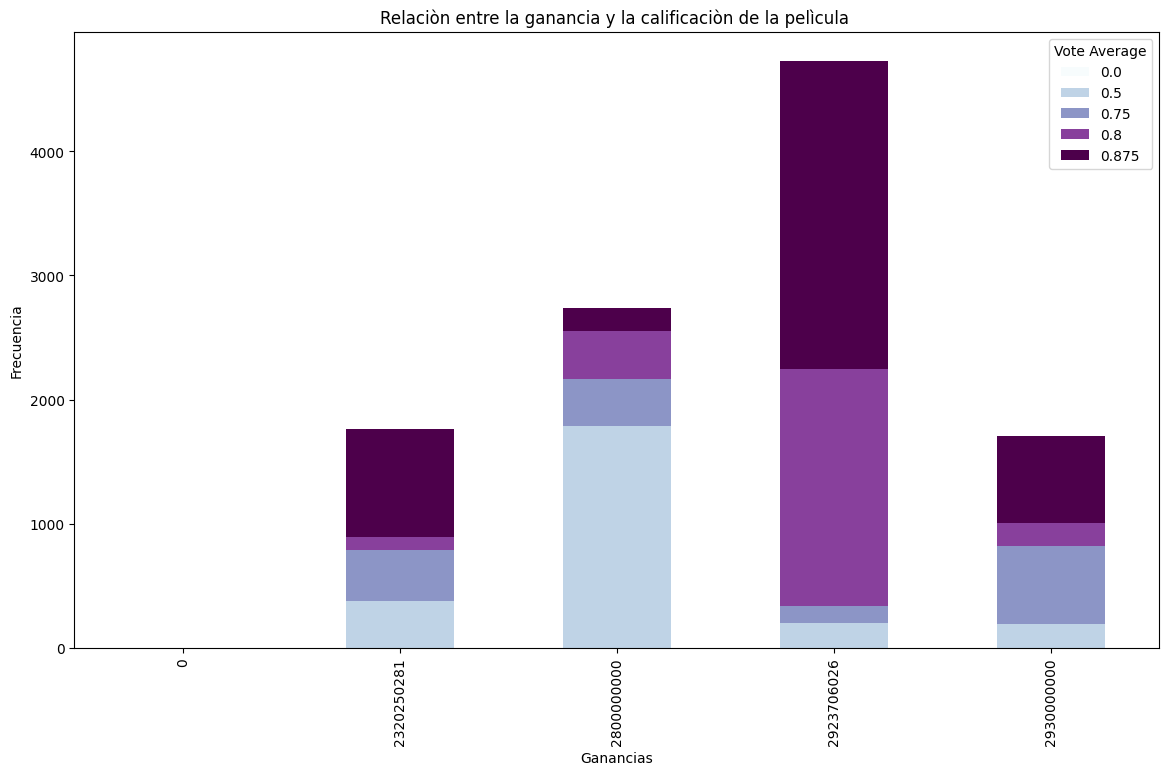

In [ ]:
data = {
    'revenue': [0,  2320250281, 2800000000, 2923706026, 2930000000 ],
    0.0: [0, 0, 0, 0, 0],
    0.5: [0, 377, 1784, 198, 189],
    0.75: [0, 411, 378, 143, 629],
    0.8: [0, 104, 389, 1902, 184],
    0.875: [0, 871, 190, 2482, 702]
}

df_contingency = pd.DataFrame(data)
df_contingency.set_index('revenue', inplace=True)

df_contingency.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='BuPu')

plt.legend(title='Vote Average', bbox_to_anchor=(1, 1))
plt.title('Relaciòn entre la ganancia y la calificaciòn de la pelìcula ')
plt.xlabel('Ganancias')
plt.ylabel('Frecuencia')

plt.show()

Con esta tabla podemos apreciar que no necesariamente las peliculas mejor puntuadas obtienen las  mejores ganancias.

## **Regresión Lineal Simple**

En esta sección del proyecto, realizaremos regresiones lineales simples, es decir, encontraremos una función que nos permita predecir una de las variables a partir de la otra. Para elegir las variables más adecuadas para este modelo, es preciso que exista una relación fuerte y significativa entre la variable dependiente (a predecir) y la independiente. Basándonos en los coeficientes de Pearson que hallamos anteriormente, **usaremos solo las variables con correlaciones fuertes y moderadas**, estas son **`vote_count`** y **`revenue`**, **`budget`** y **`revenue`**, y **`budget`** y **`vote_count`**.


Para realizar las regresiones lineales simples, importamos la librería `scikit-learn`:

In [ ]:
from sklearn.linear_model import LinearRegression

####**Predicción de los ingresos de una película a partir de la cantidad de votos recibidos**

#####**Paso 1:** Preparar datos para el modelo

In [ ]:
X = df[['vote_count']]
Y = df['revenue']

#####**Paso 2:** Crear y entrenar el modelo de regresión lineal

In [ ]:
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

#####**Paso 3:** Realizar predicciones

In [ ]:
df['predecido_revenue'] = lr.predict(X)

#####**Paso 4:** Gráfica de dispersión y línea de regresión

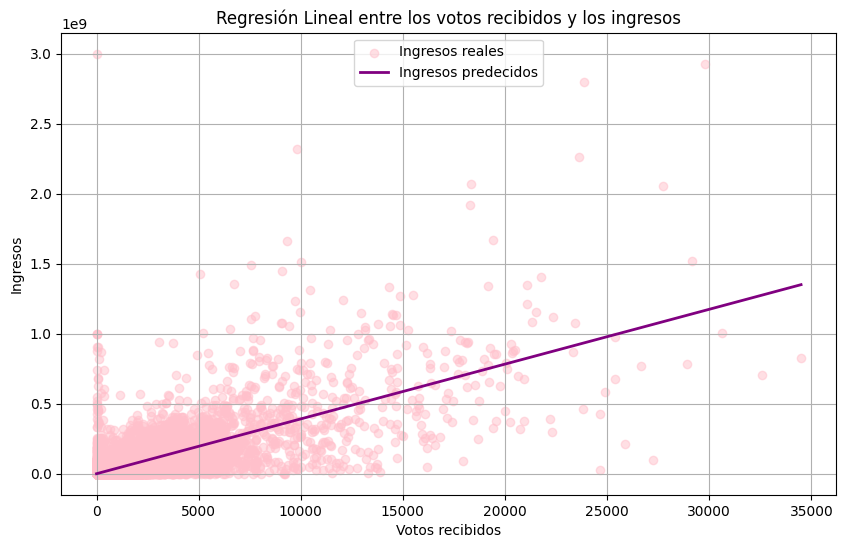

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['vote_count'], df['revenue'], color='pink', alpha=0.5, label='Ingresos reales')
plt.plot(df['vote_count'], df['predecido_revenue'], color='purple', linewidth=2, label='Ingresos predecidos')
plt.title('Regresión Lineal entre los votos recibidos y los ingresos')
plt.xlabel('Votos recibidos')
plt.ylabel('Ingresos')
plt.legend()
plt.grid(True)
plt.show()

Como se observa, cada punto rosa (Ingresos reales) tiene su "correspondiente" punto morado, contenido en la línea de regresión (Ingresos predecidos). Algunos puntos rosas y morados quedan exactamente en el mismo lugar (la predicción fue correcta), mientras que algunos quedan algo lejos (la predicción no fue acertada). Esto es normal, puesto que el modelo tiene un margen de error.

#####**Paso 5:** Ecuación de regresión lineal a partir del modelo entrenado

In [ ]:
intercepto = lr.intercept_
coeficiente = lr.coef_[0]

In [ ]:
print("Intercepto:", lr.intercept_)
print("Coeficiente:", lr.coef_[0])

Intercepto: -171061.87463176996
Coeficiente: 39151.05202894885


Respecto a estos dos valores, se puede interpretar:


* Si no hubiera votos (es decir, si vote_count fuera 0), se esperaría que los ingresos fueran de aproximadamente -171061.87.
* Por cada voto adicional (vote_count incrementado en 1), se espera que los ingresos (revenue) aumenten en promedio por 39151.05 unidades monetarias.
* Al obtenerse un coeficiente de valor positivo se infiere una relación directa y proporcional entre el número de votos y los ingresos: a medida que aumentan los votos, también se espera que aumenten los ingresos.


#####**Paso 6:** Función predictiva

In [ ]:
print(f'Y = {coeficiente} * X + {intercepto}')

Y = 39151.05202894885 * X + -171061.87463176996


####**Predicción de los ingresos de una película a partir de su presupuesto**

#####**Paso 1:** Preparar datos para el modelo

In [ ]:
X = df[['budget']]
Y = df['revenue']

#####**Paso 2:** Crear y entrenar el modelo de regresión lineal

In [ ]:
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

#####**Paso 3:** Realizar predicciones

In [ ]:
df['predecido_revenue'] = lr.predict(X)

#####**Paso 4:** Gráfica de dispersión y línea de regresión

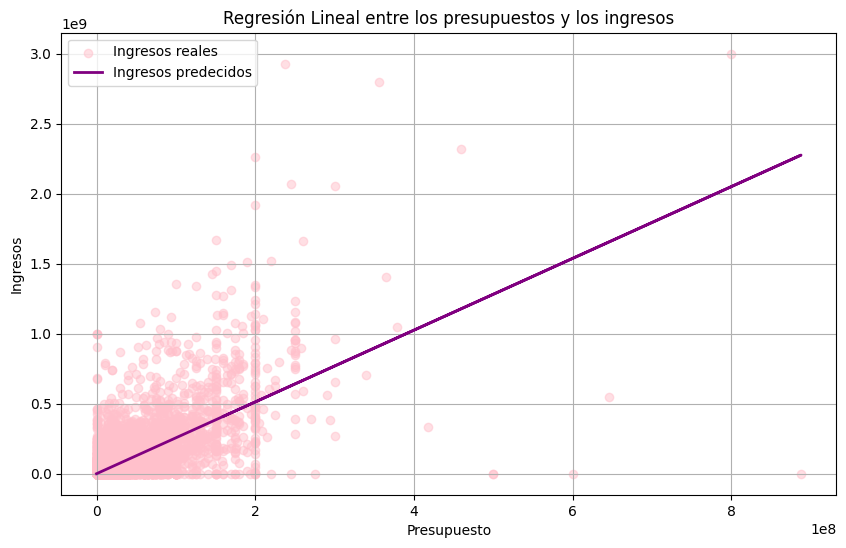

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], color='pink', alpha=0.5, label='Ingresos reales')
plt.plot(df['budget'], df['predecido_revenue'], color='purple', linewidth=2, label='Ingresos predecidos')
plt.title('Regresión Lineal entre los presupuestos y los ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.legend()
plt.grid(True)
plt.show()

#####**Paso 5:** Ecuación de regresión lineal a partir del modelo entrenado

In [ ]:
intercepto = lr.intercept_
coeficiente = lr.coef_[0]

In [ ]:
print("Intercepto:", lr.intercept_)
print("Coeficiente:", lr.coef_[0])

Intercepto: -7014.780805530027
Coeficiente: 2.5630784933782893


Respecto a estos dos valores, se puede interpretar:


* Si no hubiera presupuesto (es decir, si budget fuera 0), se esperaría que los ingresos fueran de aproximadamente -7014.78.
* Por unidad monetaria de presupuesto adicional (budget incrementado en 1), se espera que los ingresos (revenue) aumenten en promedio por 2.56 unidades monetarias.
* Al obtenerse un coeficiente de valor positivo se infiere que el presupuesto y los ingresos son directamente proporcionales: a medida que aumenta el presupuesto, también se espera que aumenten los ingresos.


#####**Paso 6:** Función predictiva

In [ ]:
print(f'Y = {coeficiente} * X + {intercepto}')

Y = 2.5630784933782893 * X + -7014.780805530027


####**Predicción de la cantidad de votos de una película a partir de su presupuesto**

#####**Paso 1:** Preparar datos para el modelo

In [ ]:
X = df[['budget']]
Y = df['vote_count']

#####**Paso 2:** Crear y entrenar el modelo de regresión lineal

In [ ]:
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

#####**Paso 3:** Realizar predicciones

In [ ]:
df['predecido_vote_count'] = lr.predict(X)

#####**Paso 4:** Gráfica de dispersión y línea de regresión

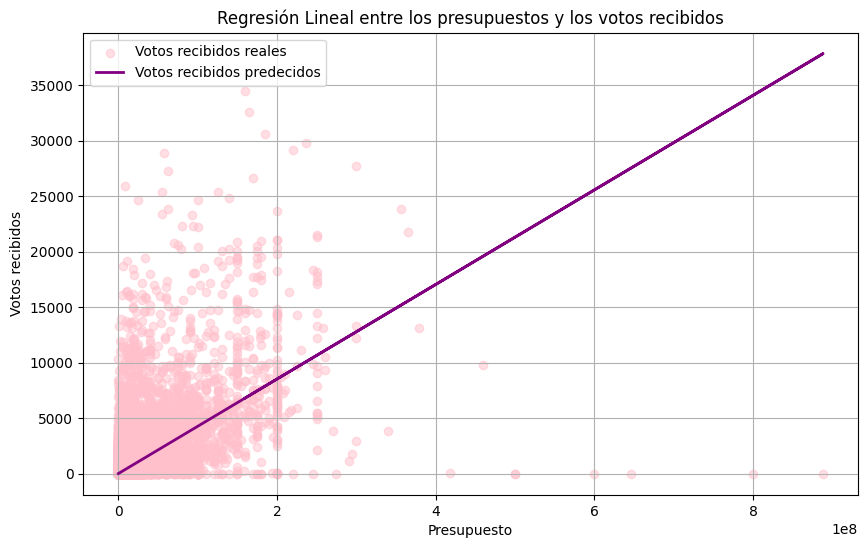

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['vote_count'], color='pink', alpha=0.5, label='Votos recibidos reales')
plt.plot(df['budget'], df['predecido_vote_count'], color='purple', linewidth=2, label='Votos recibidos predecidos')
plt.title('Regresión Lineal entre los presupuestos y los votos recibidos')
plt.xlabel('Presupuesto')
plt.ylabel('Votos recibidos')
plt.legend()
plt.grid(True)
plt.show()

#####**Paso 5:** Ecuación de regresión lineal a partir del modelo entrenado

In [ ]:
intercepto = lr.intercept_
coeficiente = lr.coef_[0]

In [ ]:
print("Intercepto:", lr.intercept_)
print("Coeficiente:", lr.coef_[0])

Intercepto: 14.607705146560694
Coeficiente: 4.257685927433969e-05


Respecto a estos dos valores, se puede interpretar:


* Si no hubiera presupuesto (es decir, si budget fuera 0), se esperaría que los votos recibidos fueran aproximadamente 14.
* Por unidad monetaria de presupuesto adicional (busget incrementado en 1), se espera que los votos recibidos (vote_count) aumenten en 4.
* Al obtenerse un coeficiente de valor positivo se infiere que el presupuesto y los votos recibidos son directamente proporcionales: a medida que aumenta el presupuesto, también se espera que aumenten los votos recibidos.


#####**Paso 6:** Función predictiva

In [ ]:
print(f'Y = {coeficiente} * X + {intercepto}')

Y = 4.257685927433969e-05 * X + 14.607705146560694


## **Bootstrap**

La información de nuestra base de datos es recopilada a través de una plataforma en línea que está abierta a todo público, pues sólo se necesita crear una cuenta a través de un correo electrónico para poder interactuar con el sitio.

Sin embargo, el sesgo que se identifica es que sólo se considera las puntuaciones de las personas que se encuentran en el nicho "cinéfilo", y no a la mayoría de las personas que ven la película.

Y aunque este es un sesgo que de alguna manera siempre estará presente al investigar de una temática en específico, se considera importante mencionarlo para fines de la toma de decisiones.

Con el objetivo de eliminar otros posibles sesgos en el análisis, utilizaremos el muestreo aleatorio, que junto con la técnica de bootstrap para la extracción y comparación de más muestras, nos ayudará a realizar un análisis más completo.

Comenzaremos analizando la información de dos de las variables con una correlación positiva más fuerte: 'vote_average' y 'vote_count'. Hemos generado 100,000 variables bootstrap para cada una, cada una tomando muestras de tamaño 15 con reemplazo de nuestros datos originales.

In [ ]:
def bootstrap(data, statistic, num_variable, variable_size):
  variable = [data.sample(n=variable_size, replace=True) for _ in range(num_variable)]
  return [statistic(variable) for variable in variable]

variable_a = bootstrap(df['vote_average'], np.mean, 100000, 15)

variable_b = bootstrap(df['vote_count'], np.mean, 100000, 15)

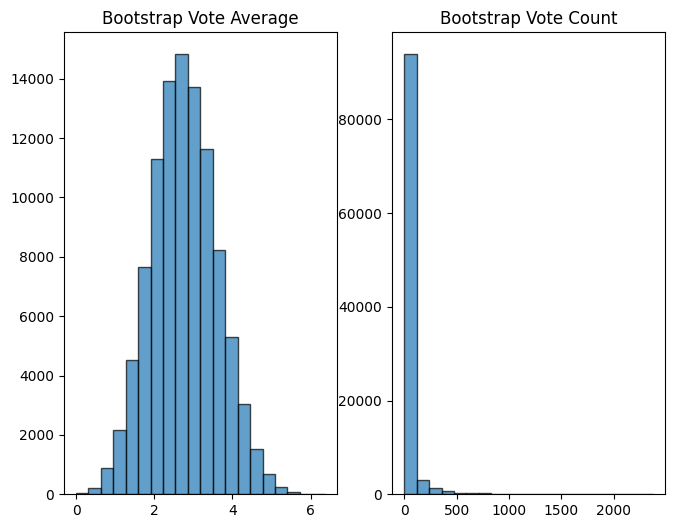

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1, 3, 1)
plt.hist(variable_a, bins=20, edgecolor= 'black', alpha= 0.7)
plt.title('Bootstrap Vote Average')

plt.subplot(1, 3, 2)
plt.hist(variable_b, bins=20, edgecolor= 'black', alpha= 0.7)
plt.title('Bootstrap Vote Count')

plt.show()

A simple vista en la gràfica podemos ver un ligero sesgo, pero lo confirmaremos en la siguiente pràctica.

En este código, estamos calculando la asimetría y la curtosis para los dos conjuntos de datos.

In [ ]:
asimetria_a, curtosis_a = pd.Series(variable_a).skew(), pd.Series(variable_a).kurt()
asimetria_b, curtosis_b = pd.Series(variable_b).skew(), pd.Series(variable_b).kurt()

print(f'Asimetría y Curtosis:')
print(f'Asimetría Vote Average: {asimetria_a}, Curtosis: {curtosis_a}')
print(f'Asimetría Vote Count: {asimetria_b}, Curtosis: {curtosis_b}')


Asimetría y Curtosis:
Asimetría Vote Average: 0.1434686409320638, Curtosis: -0.10053700822837675
Asimetría Vote Count: 8.07901082771634, Curtosis: 89.81121355401342


"Vote Average" tienen una ligera asimetría a la derecha y colas ligeras en comparación con una distribución normal. Por otro lado, tus datos para "Vote Count" tienen una fuerte asimetría a la derecha y colas muy pesadas en comparación con una distribución normal.
















In [ ]:
error_a = pd.Series(variable_a).std()
error_b = pd.Series(variable_b).std()

print(f'Error estándar:')
print(f'Error estándar Vote Average: {error_a}')
print(f'Error estándar Vote Count: {error_b}')

Error estándar:
Error estándar Vote Average: 0.838896703745607
Error estándar Vote Count: 111.68097654852075


"Vote Average" tiende a desviarse alrededor de 0.84 unidades estándar de la media. Cuanto menor sea el error estándar, menor será la dispersión de los datos con respecto a la media.
En el caso de "Vote Count", el valor del error estándar es bastante alto, indicando que los valores tienden a dispersarse alrededor de 109.79 unidades estándar de la media. Esto sugiere una mayor variabilidad en los datos de "Vote Count" en comparación con los datos de "Vote Average".

**Intervalos de confianza**

Con el objetivo de conocer más sobre nuestra información, utilizaremos los intervalos de confianza para conocer el rango en que están el 95% de nuestros datos.

In [ ]:
limite_inferiorA = pd.Series(variable_a).quantile(0.025)
limite_superiorA = pd.Series(variable_a).quantile(0.975)

limite_inferiorB = pd.Series(variable_b).quantile(0.025)
limite_superiorB = pd.Series(variable_b).quantile(0.975)

print(f'Límite inferior Vote Average: {limite_inferiorA}')
print(f'Límite superior Vote Average: {limite_superiorA}')

print(f'Límite inferior Vote Count: {limite_inferiorB}')
print(f'Límite superior Vote Count: {limite_superiorB}')



Límite inferior Vote Average: 1.1888566666666667
Límite superior Vote Average: 4.460400000000001
Límite inferior Vote Count: 0.6
Límite superior Vote Count: 287.86833333333294


"Vote Average":
Esto sugiere que con cierto nivel de confianza (generalmente se especifica, como un intervalo de confianza del 95%), se espera que la verdadera media de la variable "Vote Average" se encuentre entre aproximadamente 1.20 y 4.48.

"Vote Count":
De manera similar, con cierto nivel de confianza, se espera que la verdadera media de la variable "Vote Count" se encuentre entre aproximadamente 0.60 y 284.00.

In [ ]:
print(f'Intervalo de confianza: {limite_inferiorA} < {vote_average.mean()} < {limite_superiorA}')

Intervalo de confianza: 1.1847933333333336 < 2.7668193601338706 < 4.465403333333333


Esto indica que, con cierto nivel de confianza (generalmente especificado, como un intervalo de confianza del 95%), se espera que la verdadera media de la variable "Vote Average" esté entre aproximadamente 1.20 y 4.48. El valor específico de "2.7668149506913413" es una estimación puntual de la media y se encuentra dentro de este intervalo.

In [ ]:
intervalos= ((vote_average.mean() - limite_inferiorA) + (limite_superiorA - vote_average.mean())) / 2
print(f'Intervalo de confianza: {vote_average.mean()} +/- {intervalos}')

Intervalo de confianza: 2.7668193601338706 +/- 1.6403049999999997


Este código nos indica que nuestro intervalo de confianza tiene una variación de 1.633

<function matplotlib.pyplot.show(close=None, block=None)>

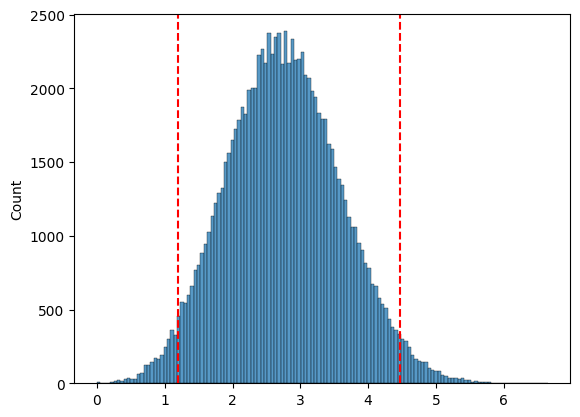

In [ ]:
sns.histplot(variable_a, kde=False)

plt.axvline(x=1.195171666666667, color='red', linestyle='--')
plt.axvline(x=4.477066666666667, color='red', linestyle='--')

plt.show

Con la visualización de este histograma, podemos inferir con un nivel de confianza del 95% que al tomar una muestra de nuestra variable inicial y calcular la estadística deseada, es probable que dicha medida se encuentre dentro del intervalo de 1.19 a 4.47.